Part 2: Descriptive Statistics

Create a Jupyter Notebook that provides the following analysis about the output population (with eGFR <= 65):

1) Table (s) listing descriptive statistics for age, height, and weight.
2) A bar chart showing the average eGFR for each BMI category described here.
3) A scatter plot using patient age for the X axis and patient eGFR for the Y axis.
4) A pie chart using patient sex.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1) Table (s) listing descriptive statistics for age, height, and weight.

In [11]:
# Load the results CSV produced by the script into a DataFrame
df = pd.read_csv("results.csv")

# Convert the relevant columns to numeric types (coerce bad values to NaN)
for col in ["Patient Age", "Patient Height", "Patient Weight", "Patient BMI", "Patient eGFR"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
filtered = df[df["Patient eGFR"].notna() & (df["Patient eGFR"] <= 65)].copy()
print(f"\nFiltered patients with Patient eGFR <= 65: {filtered.shape[0]} rows")

display(filtered.head())

# Descriptive statistics for the patient age, height, and weight on patients with eGFR <= 65
print("\nDescriptive statistics for Patient Age, Patient Height, and Patient Weight for Patients with eGFR <= 65 (filtered):")
describe_cols = [c for c in ["Patient Age", "Patient Height", "Patient Weight"] if c in filtered.columns]
display(filtered[describe_cols].describe())



Filtered patients with Patient eGFR <= 65: 41 rows


,Patient Age,Patient Height,Patient Weight,Patient BMI,Patient Sex,Patient eGFR
0,26,84,199,19.826672,M,58.487410
1,57,76,235,28.601974,M,39.445537
2,25,74,298,38.256757,F,45.387805
4,41,78,250,28.887245,M,60.135801
7,18,69,207,30.565217,M,58.604723



Descriptive statistics for Patient Age, Patient Height, and Patient Weight for Patients with eGFR <= 65 (filtered):


,Patient Age,Patient Height,Patient Weight
count,41.000000,41.000000,41.000000
mean,41.439024,72.634146,221.902439
std,14.615144,7.415376,38.822548
min,18.000000,61.000000,144.000000
25%,29.000000,65.000000,194.000000
50%,40.000000,73.000000,224.000000
75%,56.000000,79.000000,247.000000
max,64.000000,84.000000,298.000000


2) A bar chart showing the average eGFR for each BMI category described here.

C:\Users\Sarah\AppData\Local\Temp\ipykernel_20932\3708458444.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered.groupby("BMI Category")["Patient eGFR"].agg(['mean','count']).dropna()


,Average eGFR,Count
BMI Category,,
Underweight,63.770279,1
Normal Weight,51.978340,9
Overweight,53.227006,11
Obese,50.951178,20


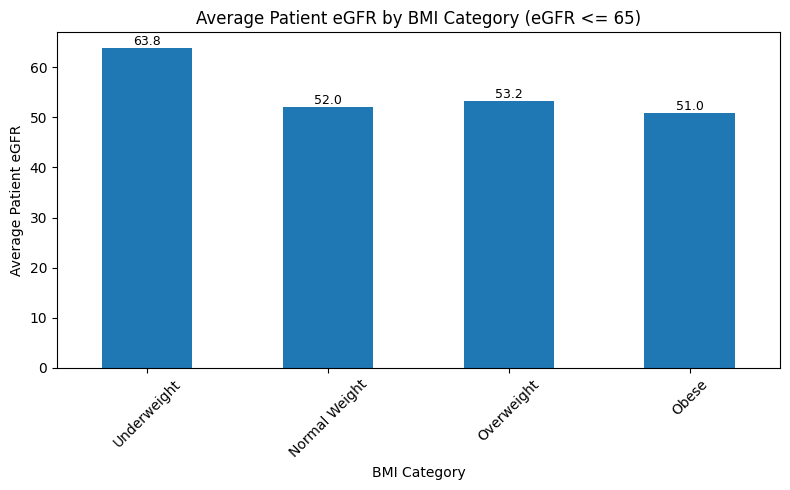

In [15]:
for col in ["Patient BMI", "Patient eGFR"]:
    if col in filtered.columns:
        filtered[col] = pd.to_numeric(filtered[col], errors="coerce")

# Define BMI categories (Underweight, Normal, Overweight, Obese)
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ["Underweight", "Normal Weight", "Overweight", "Obese"]
if "Patient BMI" in filtered.columns:
    filtered["BMI Category"] = pd.cut(filtered["Patient BMI"], bins=bins, labels=labels, right=False)
else:
    filtered["BMI Category"] = pd.NA

# Compute average eGFR per BMI category
grouped = filtered.groupby("BMI Category")["Patient eGFR"].agg(['mean','count']).dropna()
if not grouped.empty:
    grouped = grouped.rename(columns={'mean':'Average eGFR','count':'Count'})
    display(grouped)

    # Plot bar chart of mean eGFR
    fig, ax = plt.subplots(figsize=(8,5))
    grouped['Average eGFR'].plot(kind='bar', ax=ax, color='C0')
    ax.set_xlabel('BMI Category')
    ax.set_ylabel('Average Patient eGFR')
    ax.set_title('Average Patient eGFR by BMI Category (eGFR <= 65)')
    ax.set_xticklabels([str(l) for l in grouped.index], rotation=45)

    # Annotate bars with mean values
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()
else:
    print('No BMI/category data available to plot for filtered patients.')


3) A scatter plot using patient age for the X axis and patient eGFR for the Y axis.

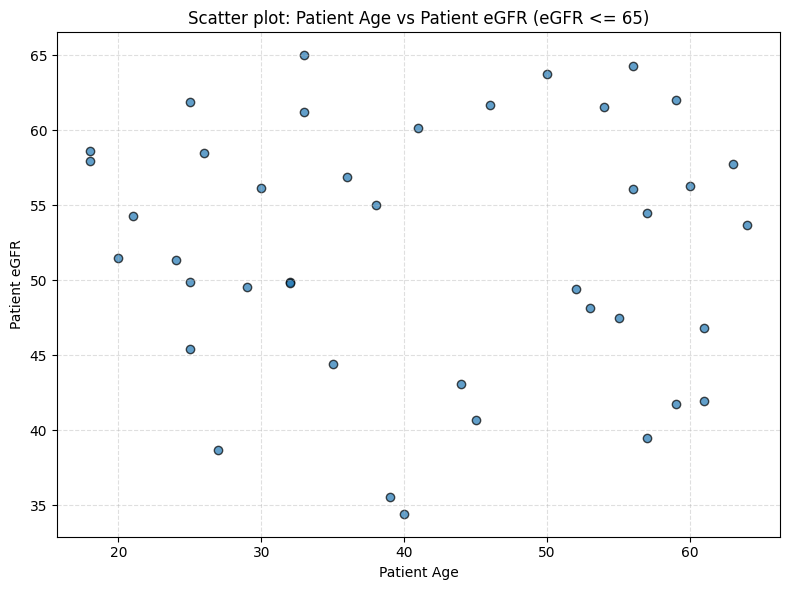

In [13]:
for col in ["Patient Age", "Patient Height", "Patient Weight", "Patient BMI", "Patient eGFR"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
filtered = df[df["Patient eGFR"].notna() & (df["Patient eGFR"] <= 65)].copy()

# Filter to rows with both age and eGFR
plot_df = filtered[filtered["Patient Age"].notna() & filtered["Patient eGFR"].notna()].copy()

if plot_df.empty:
    print("No data available for Age vs eGFR scatter plot (filtered patients).")
else:
    x = plot_df["Patient Age"]
    y = plot_df["Patient eGFR"]

    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(x, y, alpha=0.7, edgecolor='k')

    ax.set_xlabel('Patient Age')
    ax.set_ylabel('Patient eGFR')
    ax.set_title('Scatter plot: Patient Age vs Patient eGFR (eGFR <= 65)')
    ax.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


4) A pie chart using patient sex. Patient sex distribution among patients with eGFR <= 65.

,Count
Patient Sex,
M,25
F,16


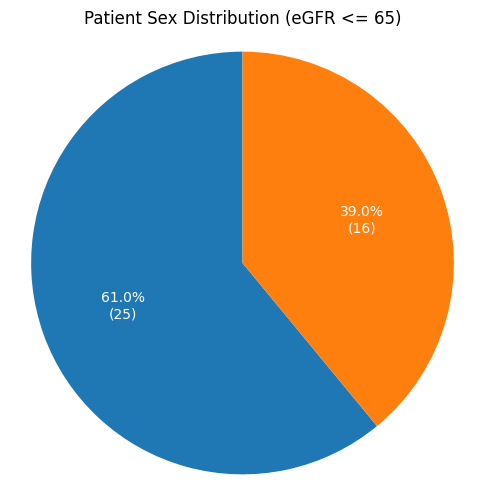

In [14]:
for col in ["Patient Age", "Patient Height", "Patient Weight", "Patient BMI", "Patient eGFR"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
filtered = df[df["Patient eGFR"].notna() & (df["Patient eGFR"] <= 65)].copy()

# Prepare Patient Sex counts from filtered set
if "Patient Sex" in filtered.columns:
    sex_counts = filtered["Patient Sex"].fillna("Unknown").value_counts()
    display(sex_counts.to_frame(name="Count"))

    # Pie chart
    fig, ax = plt.subplots(figsize=(6,6))
    wedges, texts, autotexts = ax.pie(
        sex_counts.values,
        labels=sex_counts.index,
        autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct * sex_counts.sum() / 100))})",
        startangle=90,
        textprops={"color": "white"},
    )
    ax.set_title("Patient Sex Distribution (eGFR <= 65)")
    ax.axis("equal")  # Equal aspect ensures pie is drawn as a circle.
    plt.show()
else:
    print("Column 'Patient Sex' not found in filtered results")
